In [1]:
from sklearn_som.som import SOM
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleared_data.csv")
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(62087, 49)
(48218, 49)


<Axes: >

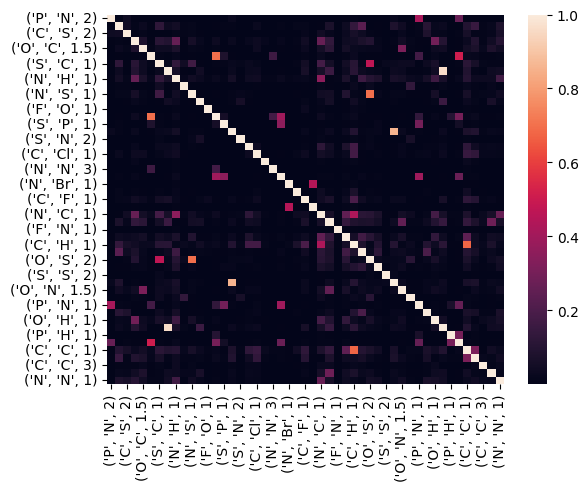

In [3]:
sns.heatmap(df.corr().abs())

In [4]:
matrix_dimension = int(2*math.sqrt(len(df.columns)))
matrix_dimension

14

In [5]:
X = df.values
model = SOM(m = 1, n = 3, dim=X.shape[1])
model.fit(X)
model.cluster_centers_

array([[[0.00000000e+000, 1.36155618e-001, 2.01707553e-002,
         1.09218273e+000, 2.41486696e-001, 1.57212780e-009,
         5.43810004e-001, 4.22527993e-001, 2.07375112e+000,
         4.48073392e-110, 1.19828839e-002, 2.06755918e-002,
         0.00000000e+000, 4.71638336e-009, 0.00000000e+000,
         3.07952881e-002, 0.00000000e+000, 1.09938776e-001,
         1.81620448e-001, 0.00000000e+000, 0.00000000e+000,
         4.94065646e-324, 0.00000000e+000, 3.00212084e-005,
         3.55725820e-001, 0.00000000e+000, 4.10246969e+000,
         1.39370844e+000, 0.00000000e+000, 5.76312963e-001,
         1.74505988e+001, 1.00963666e-001, 1.64741747e-001,
         3.91560927e-002, 0.00000000e+000, 3.13449188e-002,
         3.71795794e-002, 1.83419688e-175, 6.90466566e-280,
         1.13782562e-004, 1.11393007e-001, 2.20899137e-001,
         0.00000000e+000, 4.47519584e-017, 6.48155596e+000,
         5.22041805e+000, 3.38212952e-002, 3.90630157e-002,
         1.85951670e-001],
        [0.00

In [6]:
cluster_centers = model.cluster_centers_
cluster_centers = np.reshape(cluster_centers, (-1,X.shape[1]))
cluster_centers.shape

(3, 49)

In [8]:
pd.DataFrame(cluster_centers, columns=df.columns).to_csv("cluster_centers.csv", index=False)

In [22]:
cc = pd.DataFrame(cluster_centers, columns=df.columns)
cc.round(4)
cc = cc[cc >= 1]
cc.dropna(axis=1, inplace=True)
cc

,"('O', 'C', 1)","('N', 'H', 1)","('N', 'C', 1)","('C', 'H', 1)","('C', 'C', 1)","('C', 'C', 1.5)"
0,1.092183,2.073751,4.102470,17.450599,6.481556,5.220418
1,1.122040,2.158012,5.165827,21.798531,8.468470,6.010702
2,1.050121,2.182204,6.311693,26.110921,10.805093,4.592266


In [20]:
cc.to_excel("clustercenters.xlsx")